In [1]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests
from io import StringIO

# Setup

In [3]:
input_image_name = 'test_image.jpg'
api_host = 'http://0.0.0.0:8001/'


start the service before starting the tests
> uvicorn main:app --reload --host 0.0.0.0 --port 8008

# Data

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
# read image 
input_image = Image.open(input_image_name).convert("RGB")
# show
plt.imshow(input_image)

# healthcheck service

In [4]:
type_rq = 'healthcheck'
response = requests.get(api_host+type_rq,)
data = response.json()
data

{'healthcheck': 'Everything OK!'}

# img to json

In [14]:
type_rq = 'img_object_detection_to_json'
files = {'file': open(input_image_name, 'rb')}
response = requests.post(api_host+type_rq, files=files)

data = response.json()     
print(data)

{'detect_objects': [{'name': 'cat', 'confidence': 0.926225245}, {'name': 'dog', 'confidence': 0.9109069705}], 'detect_objects_names': 'cat, dog'}


# img to bbox img

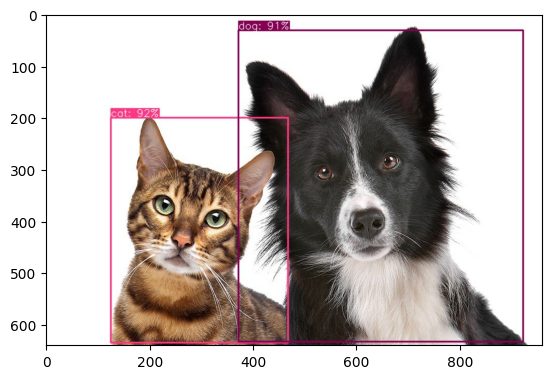

In [10]:
type_rq = 'img_object_detection_to_img'

files = {'file': open(input_image_name, 'rb')}
response = requests.post(api_host+type_rq, files=files)

img = Image.open(BytesIO(response.content)) 
plt.imshow(img)